In [2]:
import pandas as pd
import numpy as np

import yfinance as yf




import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression

from datetime import datetime, timedelta

In [2]:
top_stocks = ['RELIANCE', 'HCLTECH', 'TATAMOTORS', 'M&M', 'EICHERMOT', 'JSWSTEEL', 'BAJFINANCE', 'APOLLOHOSP', 'WIPRO', 'ADANIENT']

In [3]:
start_date = '2019-01-01'
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

1. Loading Stock data

Loading top stocks

In [4]:
dfs = []
for stock_symbol in top_stocks:
    stock_ticker = f"{stock_symbol}.NS"
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
    
    # Add the stock name as a new column
    stock_data['Stock'] = stock_symbol
    
    # Append the dataframe to the list
    dfs.append(stock_data)

# Concatenate all dataframes into a single dataframe
df = pd.concat(dfs)

# Print the combined dataframe
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  1114.683960  1116.714722  1099.676147  1110.473877  1089.558228   
2019-01-02  1104.034912  1116.417480  1090.661621  1096.010864  1075.367676   
2019-01-03  1097.100586  1104.133911  1079.864014  1082.489136  1062.100708   
2019-01-04  1087.095459  1094.079224  1070.948486  1088.333740  1067.835205   
2019-01-07  1096.605225  1107.947754  1090.661621  1094.376465  1073.763916   
...                 ...          ...          ...          ...          ...   
2023-12-29  2823.899902  2863.300049  2802.850098  2848.949951  2848.949951   
2024-01-01  2852.300049  2947.000000  2842.050049  2917.199951  2917.199951   
2024-01-02  2922.000000  2948.199951  2841.000000  2932.399902  2932.399902   
2024-01-03  3047.000000  3199.000000  2955.600098  3003.000000  3003.000000   
2024-01-04  3039.399902  3044.449951  2990.000000  2998.300049  2998.300049   

              Volume     Stock  
Date                            
2019-01-01   4498087  RELIANCE  
2019-01-02   7212697  RELIANCE  
2019-01-03   7517041  RELIANCE  
2019-01-04   8545382  RELIANCE  
2019-01-07   5565822  RELIANCE  
...              ...       ...  
2023-12-29   1507086  ADANIENT  
2024-01-01   2898619  ADANIENT  
2024-01-02   2671368  ADANIENT  
2024-01-03  19725411  ADANIENT  
2024-01-04   2975620  ADANIENT  

[12390 rows x 7 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12390 entries, 2019-01-01 to 2024-01-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       12390 non-null  float64
 1   High       12390 non-null  float64
 2   Low        12390 non-null  float64
 3   Close      12390 non-null  float64
 4   Adj Close  12390 non-null  float64
 5   Volume     12390 non-null  int64  
 6   Stock      12390 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 774.4+ KB


In [6]:
df.describe(include = 'all')

Open          High           Low         Close     Adj Close  \
count   12390.000000  12390.000000  12390.000000  12390.000000  12390.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     1761.484645   1784.761084   1736.165500   1759.895783   1734.869083   
std      1752.865663   1773.354338   1729.671332   1751.021627   1742.467369   
min        66.500000     66.900002     63.500000     65.300003     65.097115   
25%       474.824989    481.687508    468.262497    475.312500    456.402527   
50%      1146.000000   1161.924988   1131.299988   1146.174988   1093.873779   
75%      2484.750000   2514.000000   2454.162598   2482.612488   2466.621155   
max      8139.799805   8192.000000   8095.450195   8168.549805   8168.549805   

              Volume     Stock  
count   1.239000e+04     12390  
unique           NaN        10  
top              NaN  RELIANCE  
freq             NaN      1239  
mean    7.870267e+06       NaN  
std     1.609362e+07       NaN  
min     0.000000e+00       NaN  
25%     1.458153e+06       NaN  
50%     3.577844e+06       NaN  
75%     7.539322e+06       NaN  
max     3.905778e+08       NaN

Loading NIFTY data

In [7]:
nifty_ticker = '^NSEI'

# Get historical data for Nifty 50
nifty_data = yf.download(nifty_ticker, start=start_date, end=end_date)

# Display the DataFrame
nifty_data

[*********************100%%**********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2019-01-02  10868.849609  10895.349609  10735.049805  10792.500000   
2019-01-03  10796.799805  10814.049805  10661.250000  10672.250000   
2019-01-04  10699.700195  10741.049805  10628.650391  10727.349609   
2019-01-07  10804.849609  10835.950195  10750.150391  10771.799805   
2019-01-08  10786.250000  10818.450195  10733.250000  10802.150391   
...                  ...           ...           ...           ...   
2023-12-28  21715.000000  21801.449219  21678.000000  21778.699219   
2023-12-29  21737.650391  21770.300781  21676.900391  21731.400391   
2024-01-02  21751.349609  21755.599609  21555.650391  21665.800781   
2024-01-03  21661.099609  21677.000000  21500.349609  21517.349609   
2024-01-04  21605.800781  21685.650391  21564.550781  21658.599609   

               Adj Close  Volume  
Date                              
2019-01-02  10792.500000  309700  
2019-01-03  10672.250000  286200  
2019-01-04  10727.349609  296600  
2019-01-07  10771.799805  269400  
2019-01-08  10802.150391  277700  
...                  ...     ...  
2023-12-28  21778.699219  393100  
2023-12-29  21731.400391  270900  
2024-01-02  21665.800781  263700  
2024-01-03  21517.349609  311900  
2024-01-04  21658.599609  339200  

[1235 rows x 6 columns]

2. Performance Calculations

In [8]:
# Function to calculate performance metrics for a single row
def calculate_metrics(row):
    stock_data = df[df['Stock'] == row['Stock']][:row.name]  # Filter data up to the current date
    
    # Calculate CAGR
    cagr = ((row['Adj Close'] / stock_data['Adj Close'].iloc[0]) ** (252 / len(stock_data)) - 1) * 100
    
    # Calculate volatility
    volatility = np.sqrt(252) * stock_data['Adj Close'].pct_change().std() * 100
    
    # Calculate Sharpe Ratio
    sharpe_ratio = np.sqrt(252) * (stock_data['Adj Close'].pct_change().mean() / stock_data['Adj Close'].pct_change().std())
    
    # Calculate daily return
    daily_return = stock_data['Close'].pct_change().iloc[-1] * 100
    
    return pd.Series({'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio, 'Daily Return': daily_return})

# Create new columns for metrics
df[['CAGR', 'Volatility', 'Sharpe Ratio', 'Daily Return']] = df.apply(calculate_metrics, axis=1)

# Display the updated DataFrame with performance metrics
print(df[['Close', 'CAGR', 'Volatility', 'Sharpe Ratio', 'Daily Return']])


                  Close       CAGR  Volatility  Sharpe Ratio  Daily Return
Date                                                                      
2019-01-01  1110.473877   0.000000         NaN           NaN           NaN
2019-01-02  1096.010864 -80.829951         NaN           NaN     -1.302418
2019-01-03  1082.489136 -88.281249    0.771142   -414.388295     -1.233722
2019-01-04  1088.333740 -71.881717   16.579419    -10.113831      0.539923
2019-01-07  1094.376465 -52.094940   16.646758     -5.453491      0.555227
...                 ...        ...         ...           ...           ...
2023-12-29  2848.949951  81.037367   54.888659      1.359116      1.389731
2024-01-01  2917.199951  81.825955   54.874611      1.367271      2.395619
2024-01-02  2932.399902  81.930604   54.852483      1.368653      0.521046
2024-01-03  3003.000000  82.725421   54.838557      1.376837      2.407588
2024-01-04  2998.300049  82.578367   54.816772      1.375691     -0.156509

[12390 rows x 5 columns]

3. strategy vs benchmark

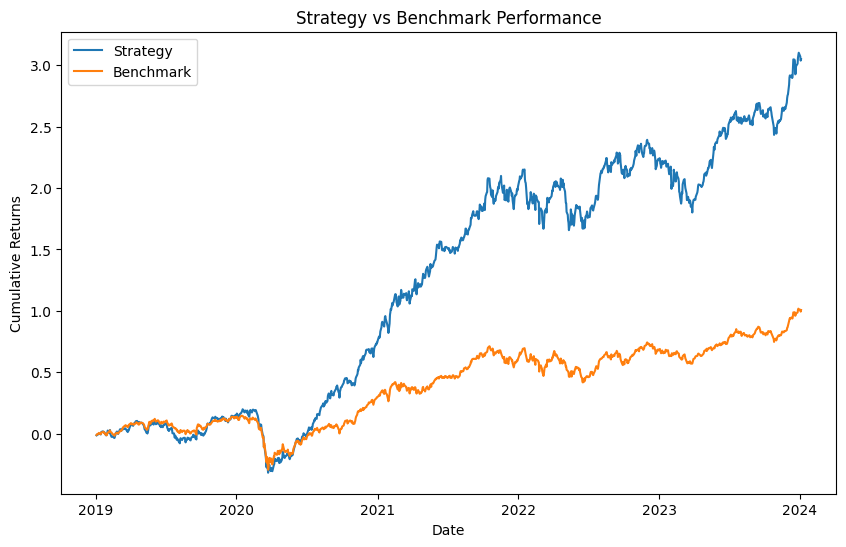

In [9]:
# Load your stock data
stock_data = df


# Load your benchmark (Nifty) data
benchmark_data = nifty_data

# Define your strategy (for example, using Close prices)
strategy_returns = stock_data.pivot_table(index='Date', columns='Stock', values='Close').pct_change()

# Calculate benchmark (Nifty) returns
benchmark_returns = benchmark_data['Close'].pct_change()

# Create a DataFrame for strategy and benchmark returns
returns_df = pd.DataFrame({'Strategy': strategy_returns.mean(axis=1), 'Benchmark': benchmark_returns})

# Drop NaN values
returns_df = returns_df.dropna()

# Plot the strategy vs benchmark
plt.figure(figsize=(10, 6))
plt.plot(returns_df.index, (1 + returns_df).cumprod() - 1, label=['Strategy', 'Benchmark'])
plt.title('Strategy vs Benchmark Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

daily returns for each stock in the Stock column are taken as a mean to form the Strategy column

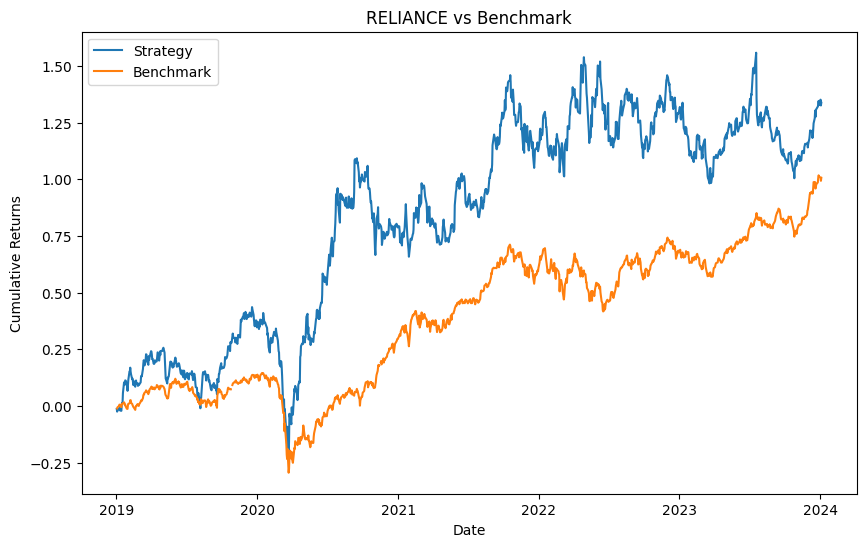

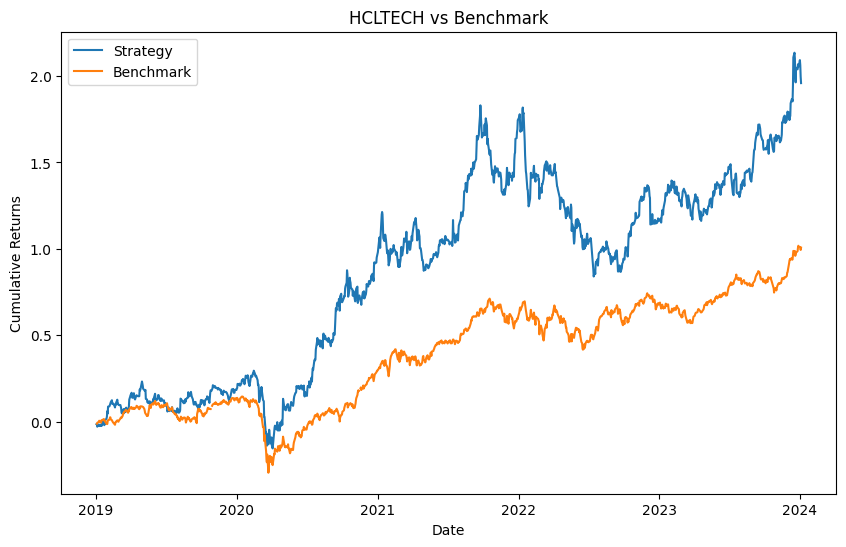

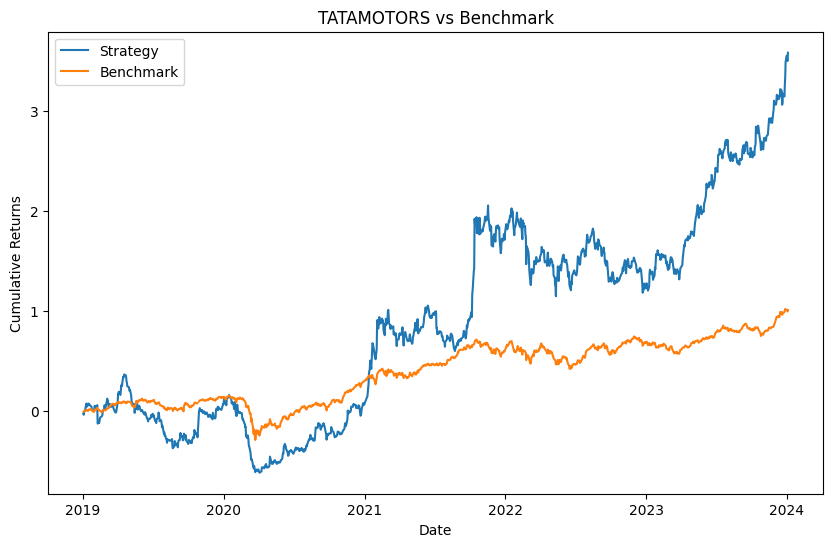

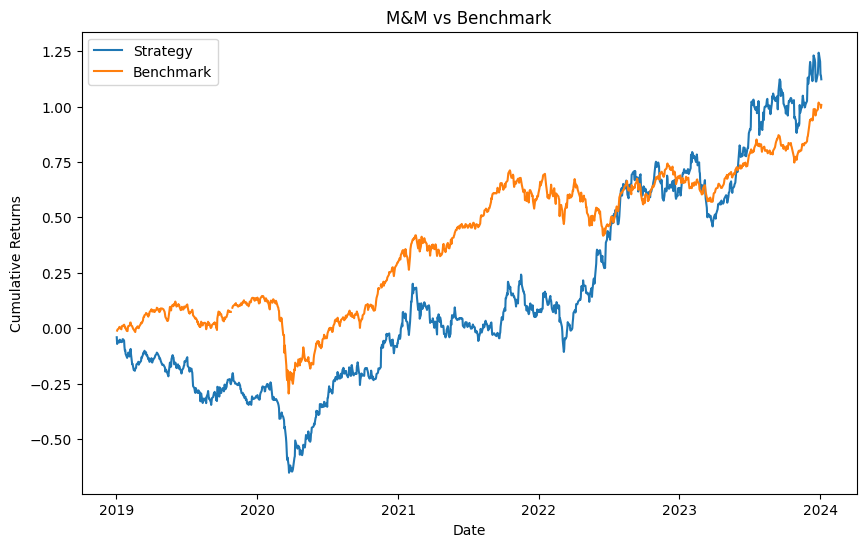

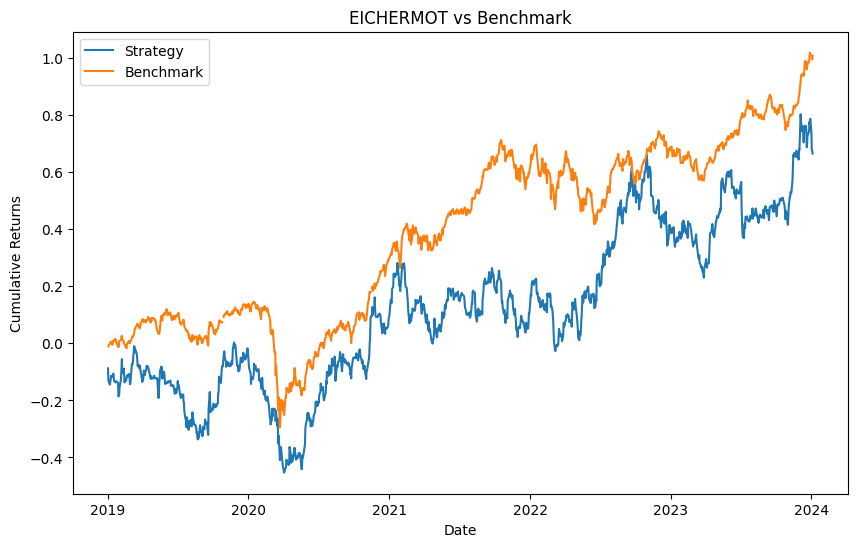

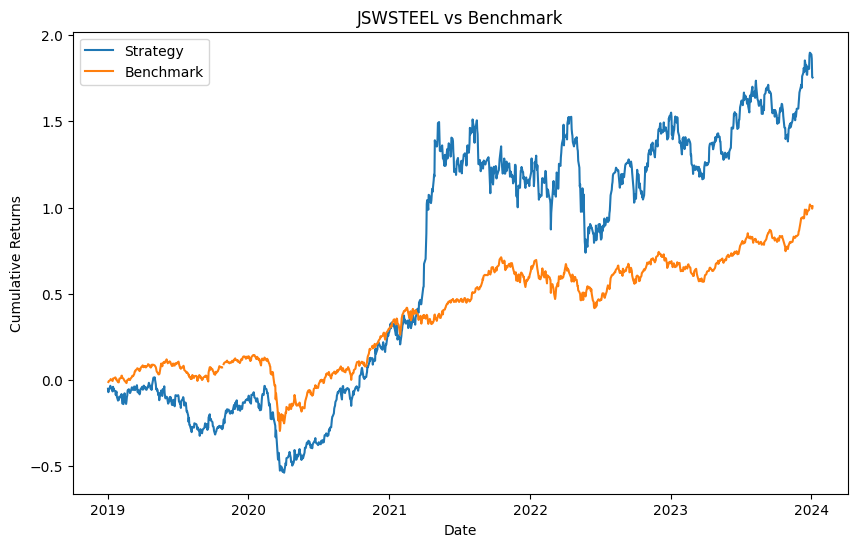

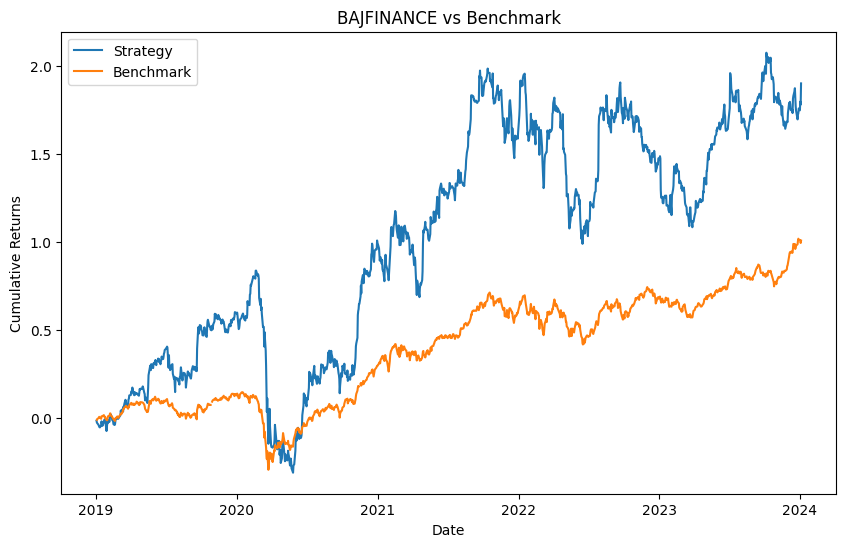

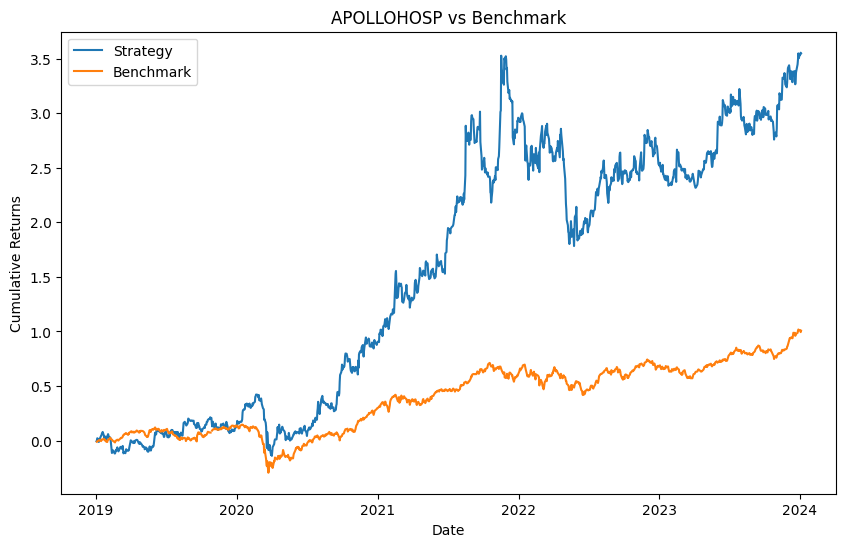

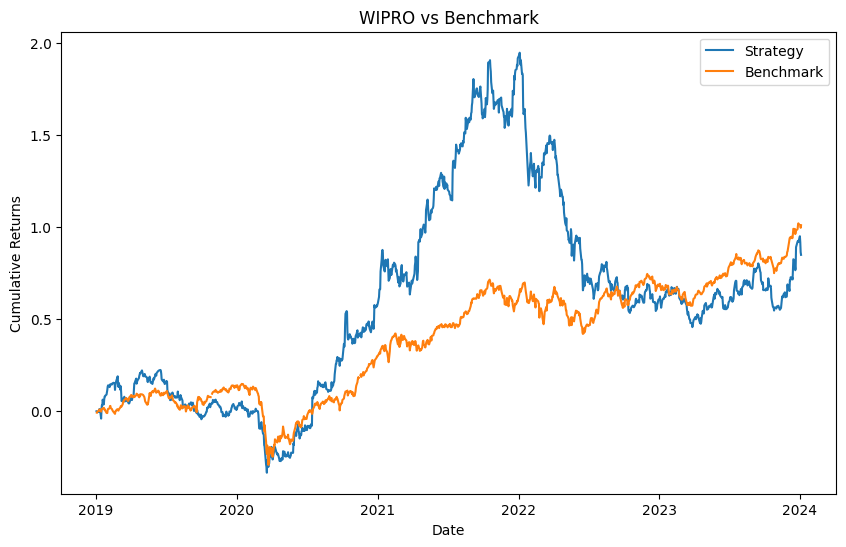

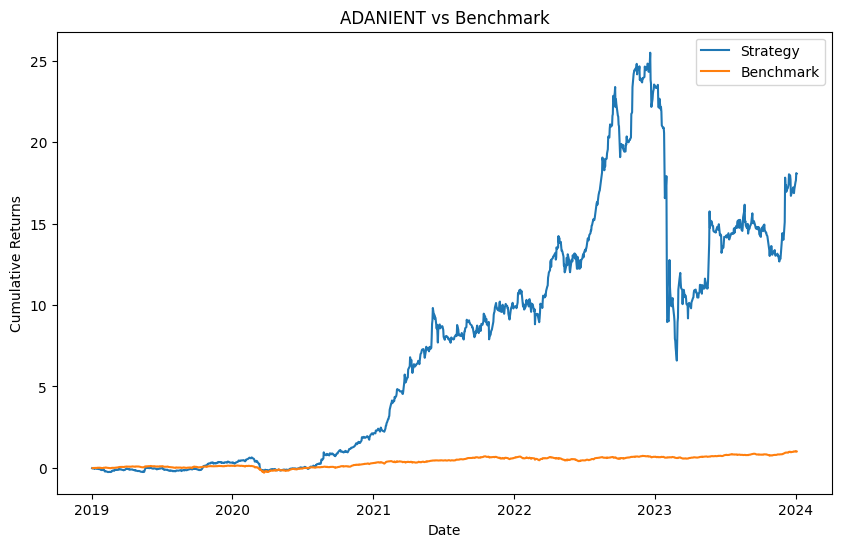

In [10]:
stock_dfs = {}

# Fetch historical data for each stock and store in the dictionary
for stock_symbol in top_stocks:
    stock_data = df[df['Stock'] == stock_symbol].copy()
    
    # Add the stock name as a new column
    stock_data['Stock'] = stock_symbol
    
    # Store the dataframe in the dictionary with a key based on the stock symbol
    stock_dfs[stock_symbol] = stock_data

# Define a function to calculate returns and plot the performance
def calculate_and_plot_returns(strategy_data, benchmark_data, title):
    # Define your strategy (for example, using Close prices)
    strategy_returns = strategy_data.pivot_table(index='Date', columns='Stock', values='Close').pct_change()

    # Calculate benchmark returns
    benchmark_returns = benchmark_data['Close'].pct_change()

    # Create a DataFrame for strategy and benchmark returns
    returns_df = pd.DataFrame({'Strategy': strategy_returns.mean(axis=1), 'Benchmark': benchmark_returns})


    # Plot the strategy vs benchmark
    plt.figure(figsize=(10, 6))
    plt.plot(returns_df.index, (1 + returns_df).cumprod() - 1, label=['Strategy', 'Benchmark'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

# Iterate through each stock and analyze its performance
for stock_symbol, stock_data in stock_dfs.items():
    calculate_and_plot_returns(stock_data, benchmark_data, f'{stock_symbol} vs Benchmark')


4. BUY vs SELL

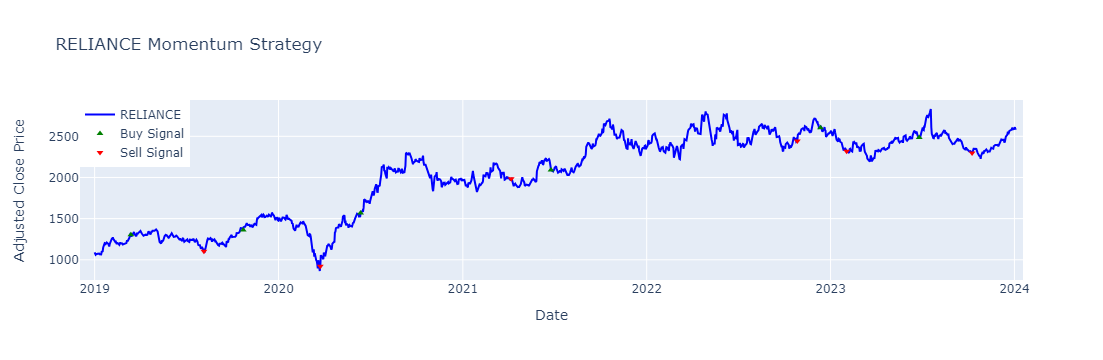

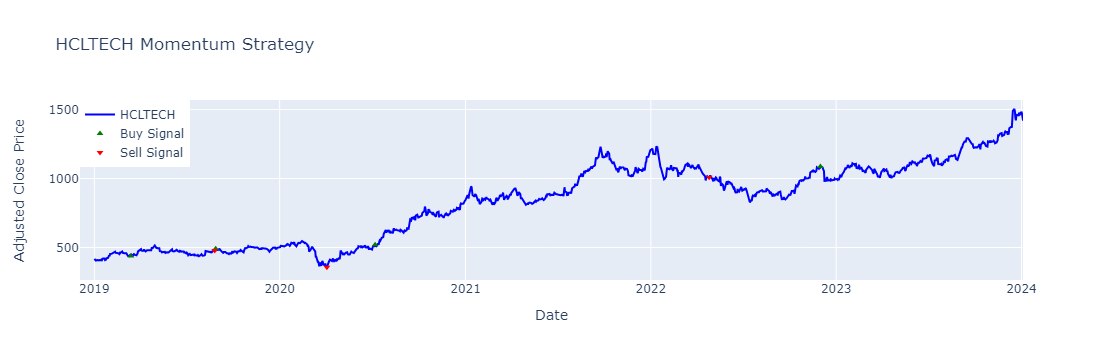

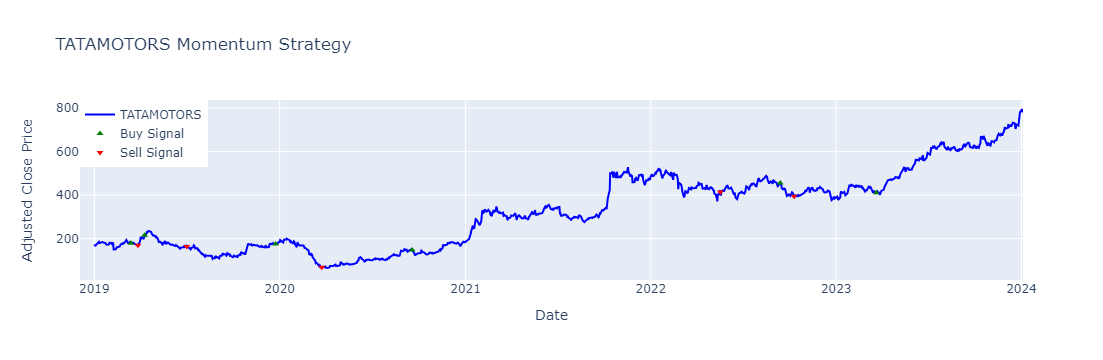

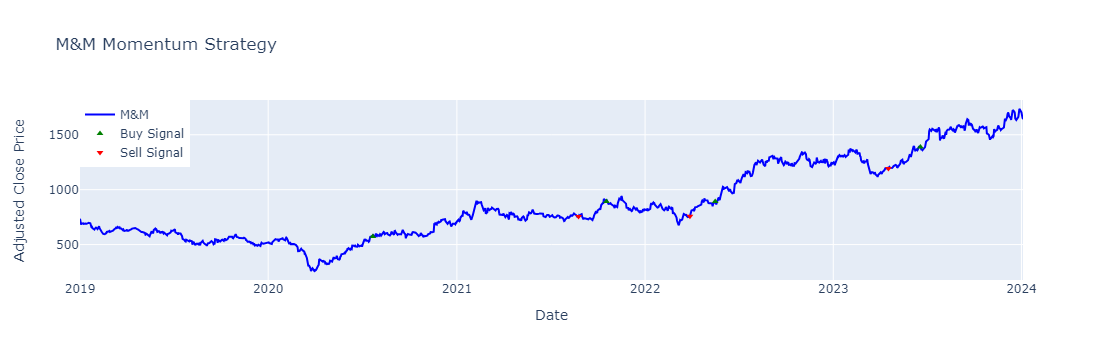

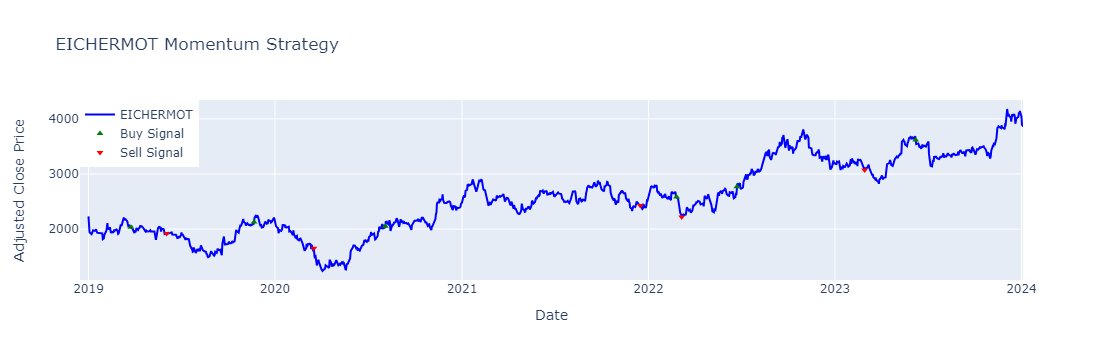

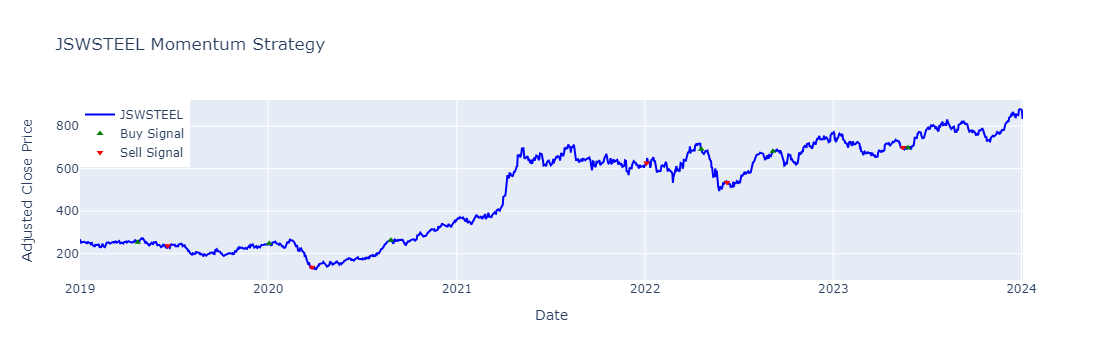

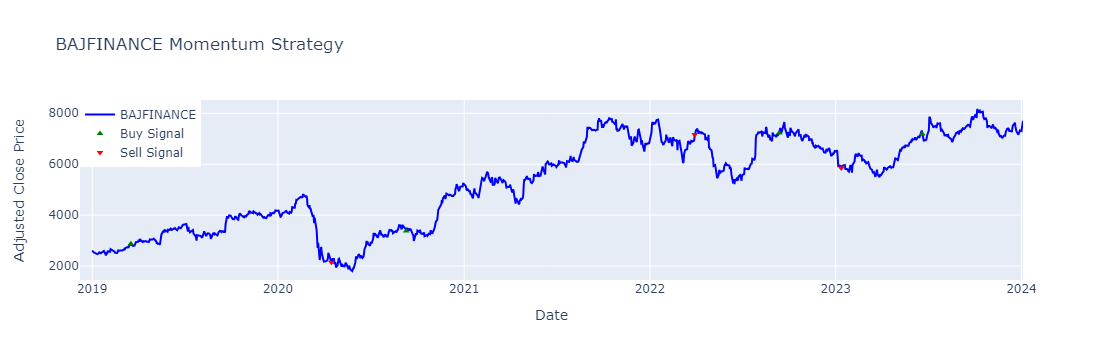

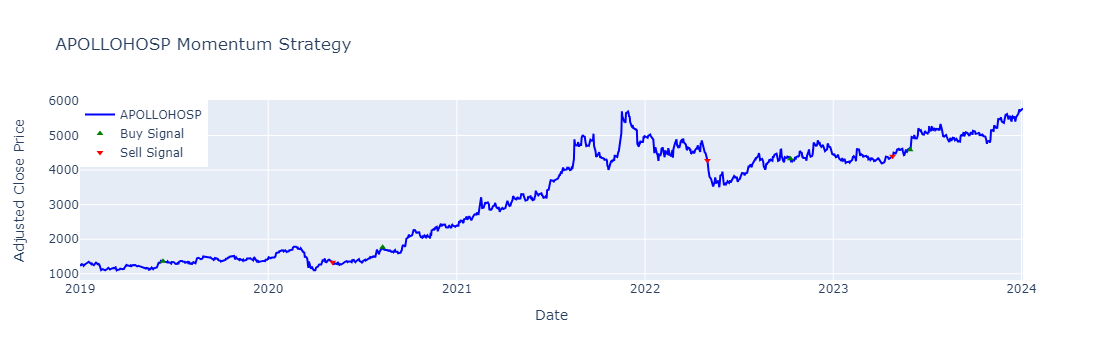

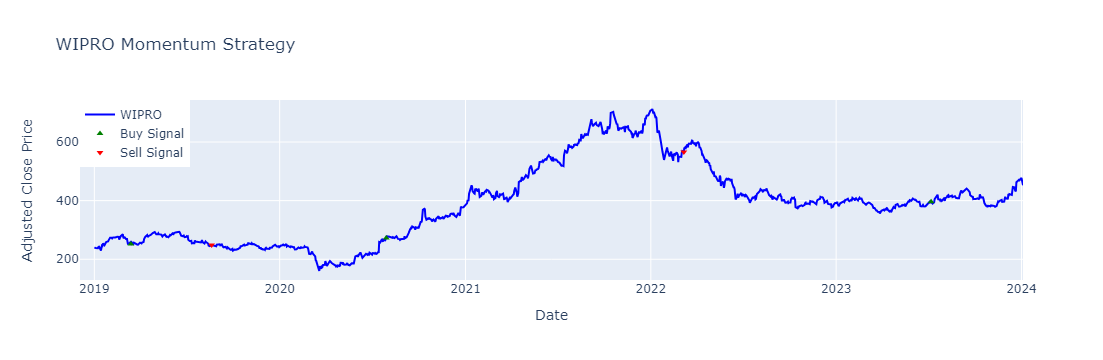

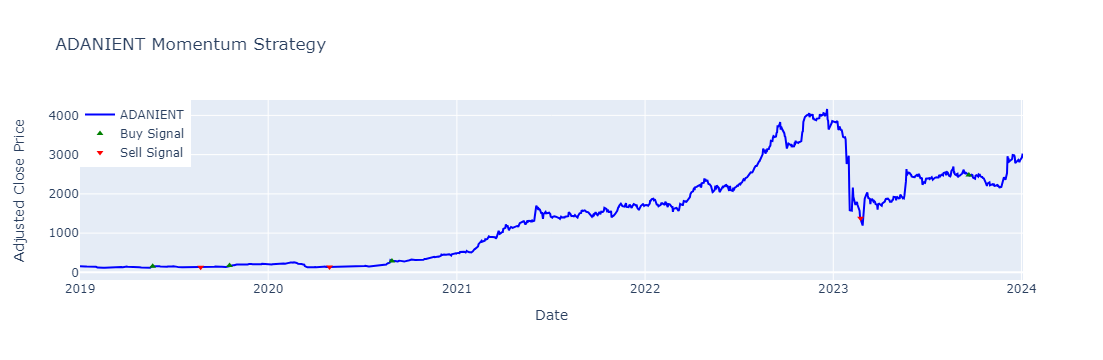

In [11]:
def momentum_strategy(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create short simple moving average
    signals['short_mavg'] = data.rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    signals['long_mavg'] = data.rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

def plot_momentum_strategy(data, strategy_data, stock_label):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=stock_label, line=dict(color='blue')))
    
    # Plot Buy signals
    buy_signals = strategy_data[strategy_data['positions'] == 1]
    fig.add_trace(go.Scatter(x=buy_signals.index, y=data.loc[buy_signals.index],
                             mode='markers', marker=dict(color='green', symbol='triangle-up'),
                             name='Buy Signal'))

    # Plot Sell signals
    sell_signals = strategy_data[strategy_data['positions'] == -1]
    fig.add_trace(go.Scatter(x=sell_signals.index, y=data.loc[sell_signals.index],
                             mode='markers', marker=dict(color='red', symbol='triangle-down'),
                             name='Sell Signal'))

    fig.update_layout(title=f'{stock_label} Momentum Strategy',
                      xaxis_title='Date',
                      yaxis_title='Adjusted Close Price',
                      legend=dict(x=0, y=1, traceorder='normal'))

    fig.show()
    
# Define momentum strategy parameters
short_window = 50
long_window = 200

# Iterate through each stock and analyze its momentum strategy
for stock_ticker in top_stocks:
    # Get historical data for the current stock from df
    stock_data = df[df['Stock'] == stock_ticker].copy()

    # Apply the momentum strategy for the current stock
    momentum_signals = momentum_strategy(stock_data['Adj Close'], short_window, long_window)

    # Plot the strategy for the current stock using Plotly
    plot_momentum_strategy(stock_data['Adj Close'], momentum_signals, stock_ticker)


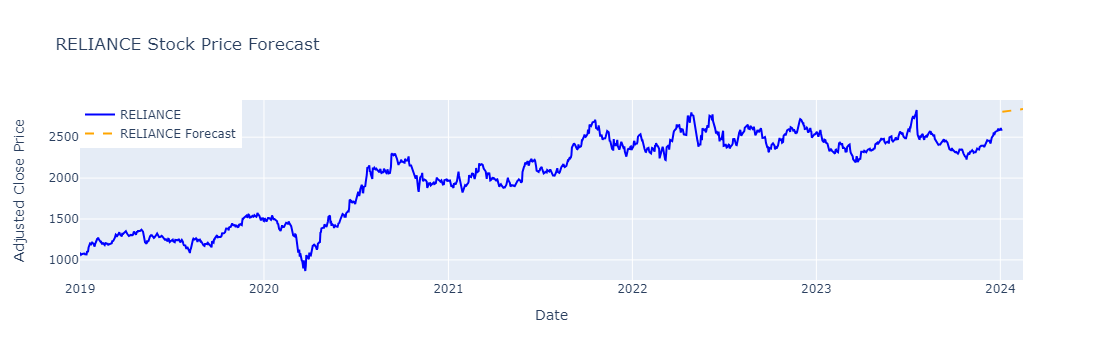

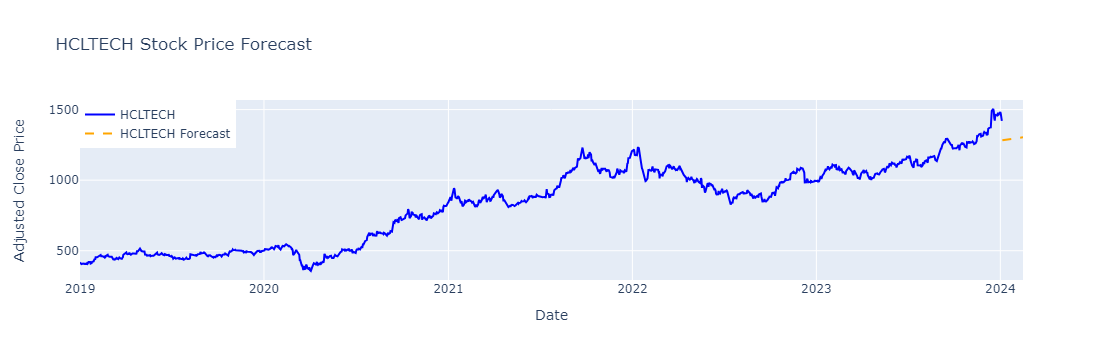

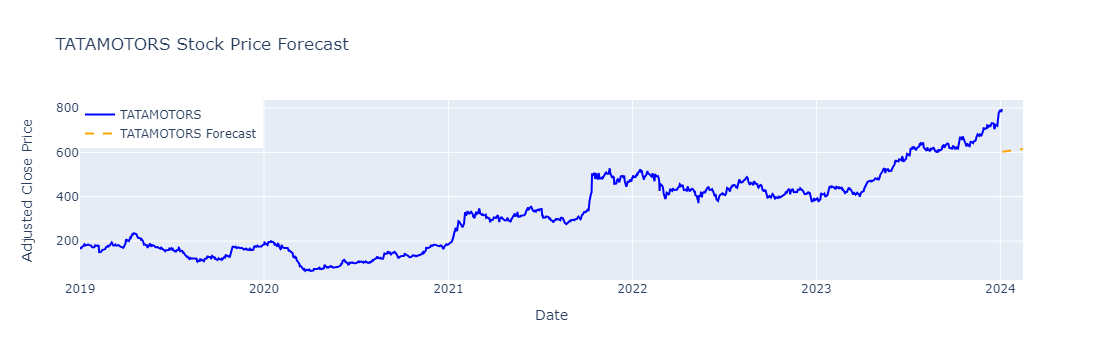

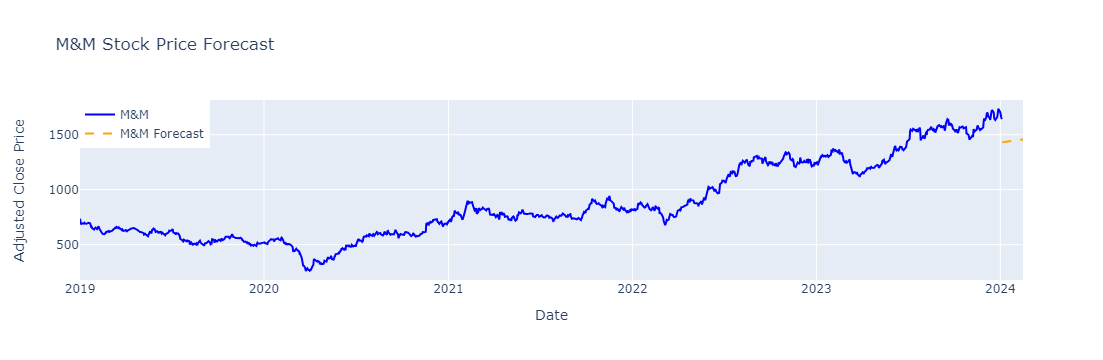

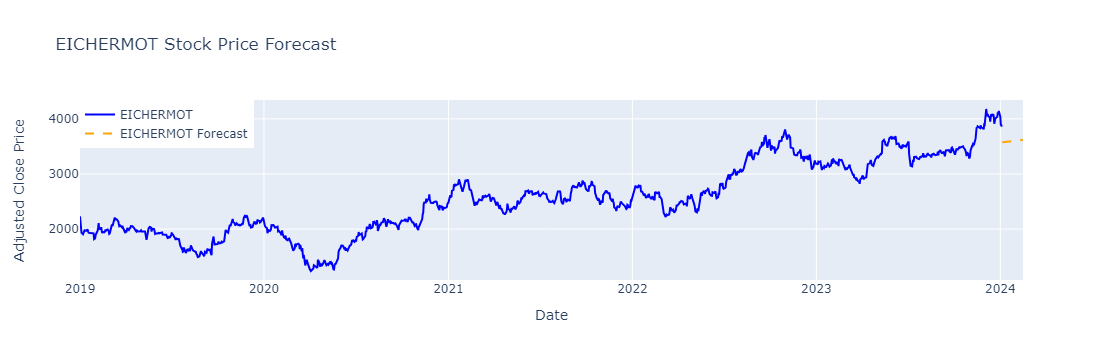

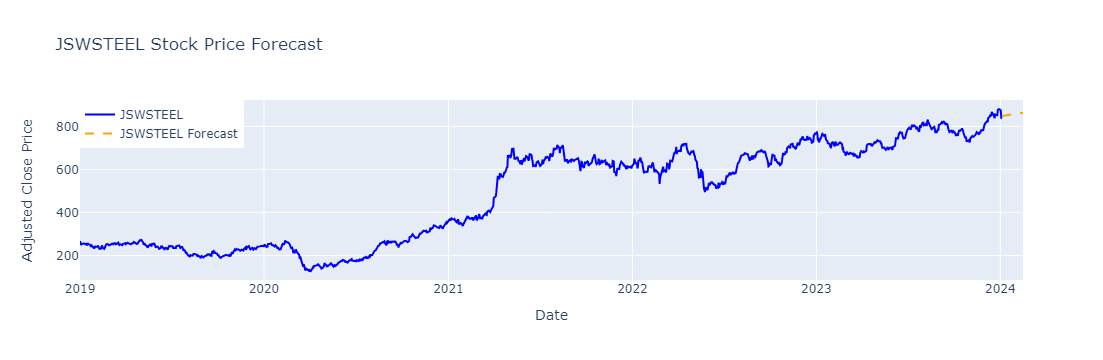

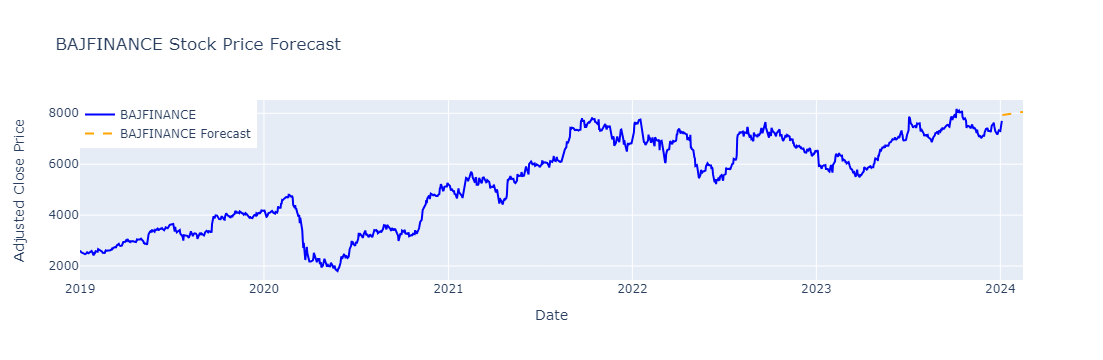

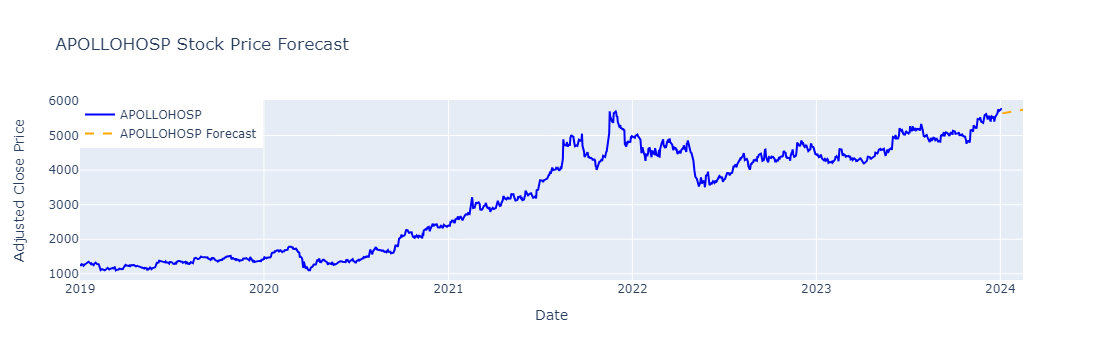

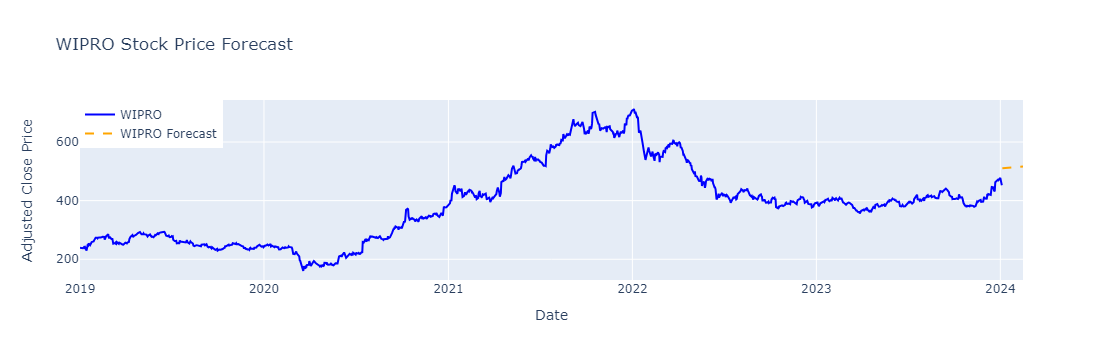

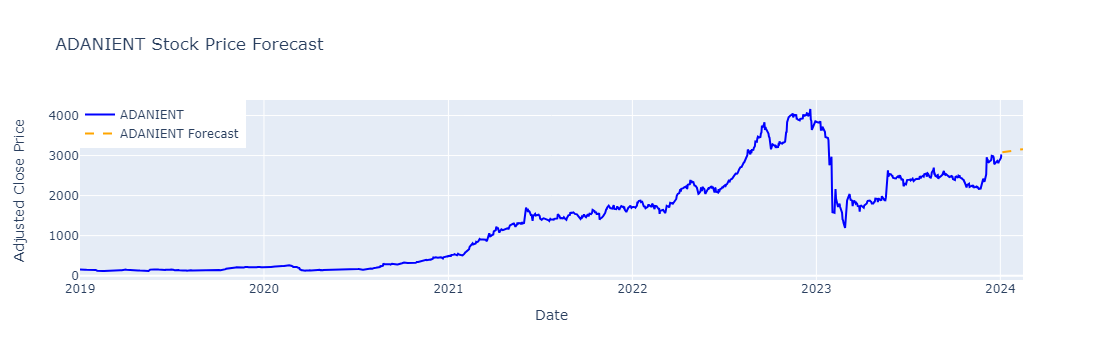

In [12]:
def forecast_stock(data, forecast_days):
    # Create features (days) for the linear regression model
    data['days'] = (data.index - data.index[0]).days
    X = data['days'].values.reshape(-1, 1)
    y = data['Adj Close'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Create future dates for forecasting
    future_dates = pd.date_range(data.index[-1] + timedelta(days=1), periods=forecast_days, freq='B')

    # Predict future values
    future_days = (future_dates - data.index[0]).days.values.reshape(-1, 1)
    forecast = model.predict(future_days)

    # Create a DataFrame for the forecast
    forecast_df = pd.DataFrame(index=future_dates, data={'Forecast': forecast})

    return forecast_df

def plot_forecast(data, forecast_df, stock_label):
    fig = go.Figure()

    # Plot historical data
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name=stock_label, line=dict(color='blue')))

    # Plot forecast
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['Forecast'],
                             mode='lines', name=f'{stock_label} Forecast', line=dict(color='orange', dash='dash')))

    fig.update_layout(title=f'{stock_label} Stock Price Forecast',
                      xaxis_title='Date',
                      yaxis_title='Adjusted Close Price',
                      legend=dict(x=0, y=1, traceorder='normal'))

    fig.show()

# Forecast parameters
forecast_days = 30  # Adjust as needed

# Iterate through each stock, create a forecast, and plot the results
for stock_ticker in top_stocks:
    # Get historical data for the current stock from df
    stock_data = df[df['Stock'] == stock_ticker].copy()

    # Create a forecast for the current stock
    forecast_df = forecast_stock(stock_data, forecast_days)

    # Plot the forecast for the current stock using Plotly
    plot_forecast(stock_data, forecast_df, stock_ticker)


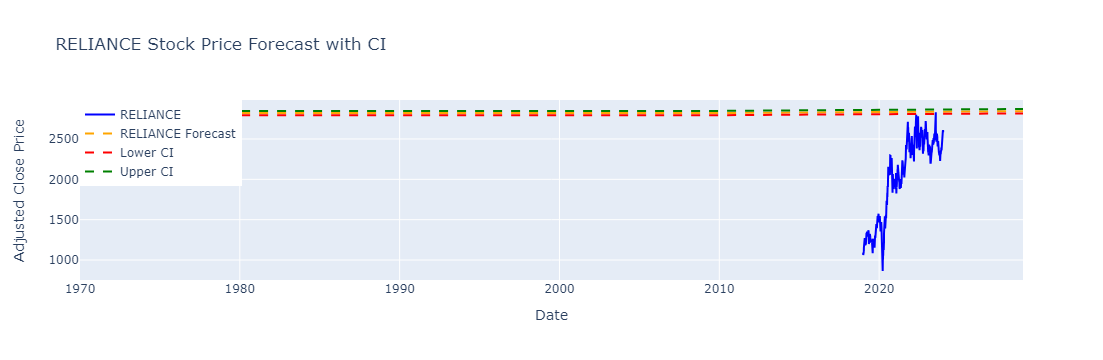

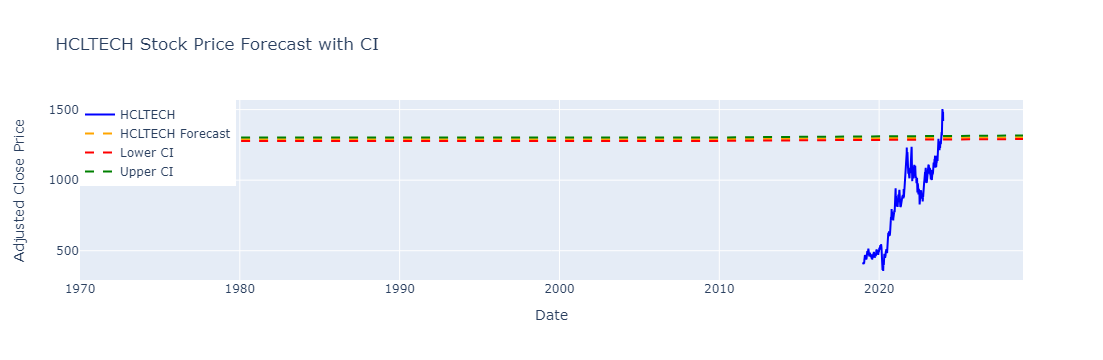

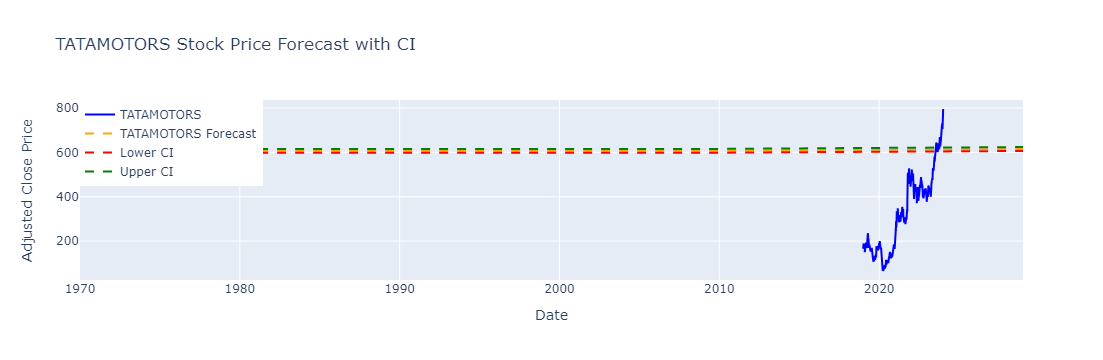

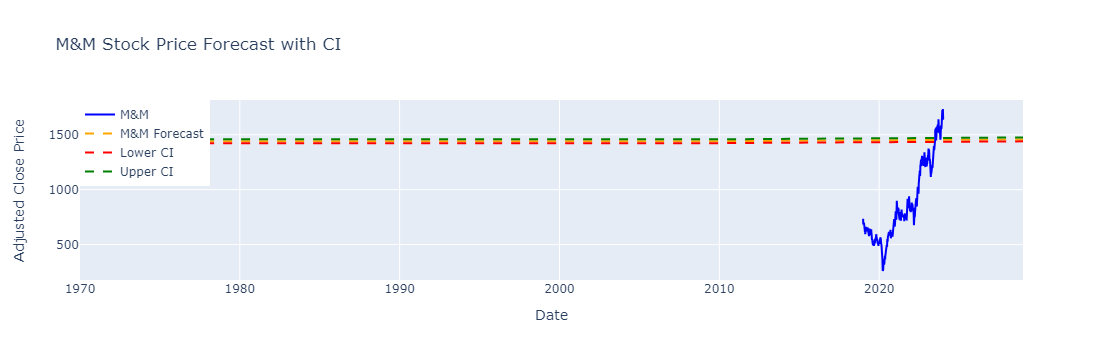

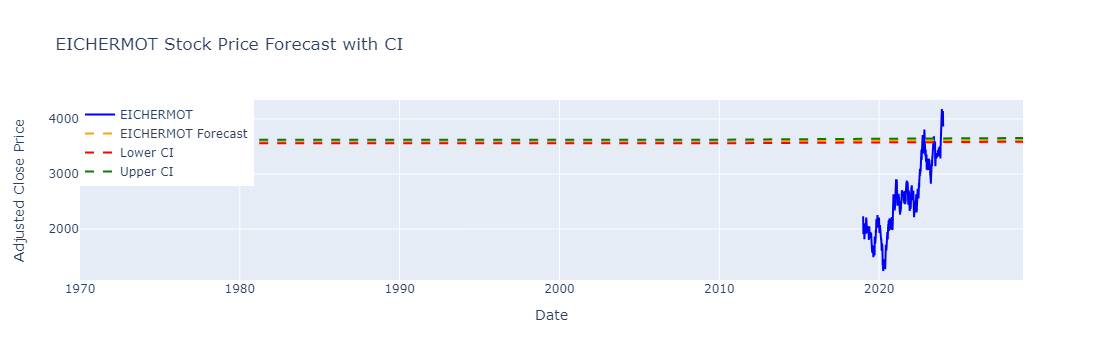

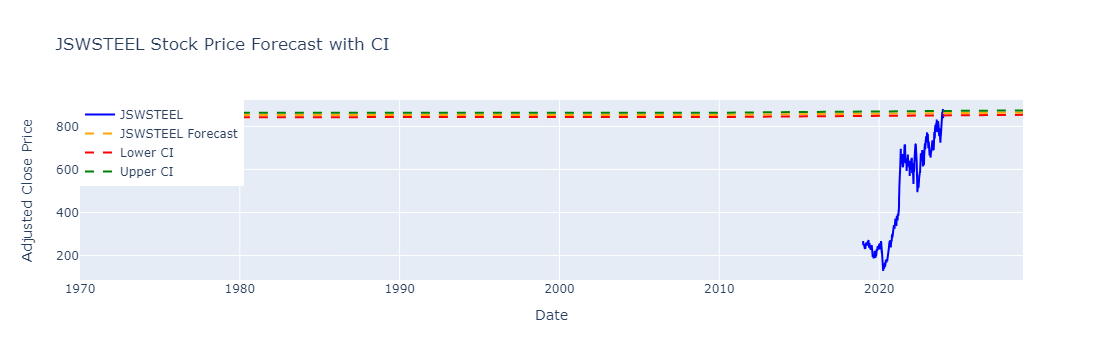

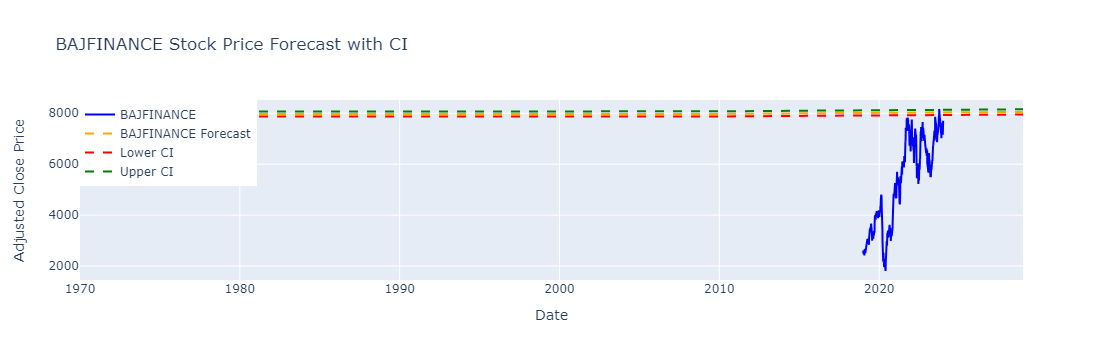

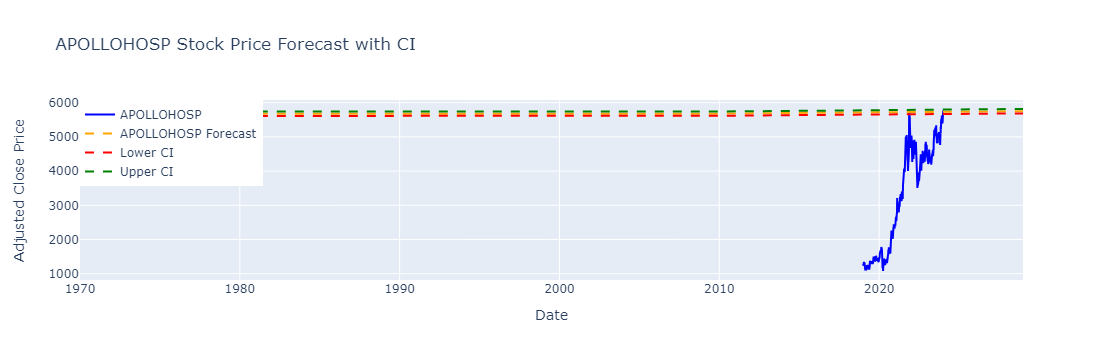

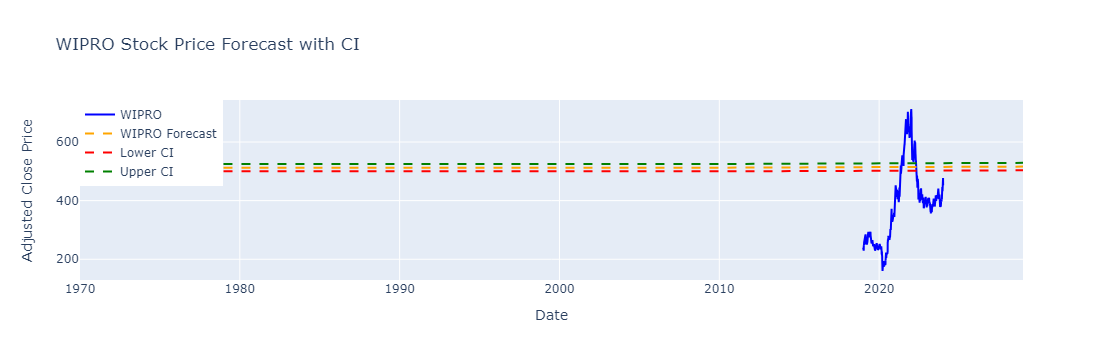

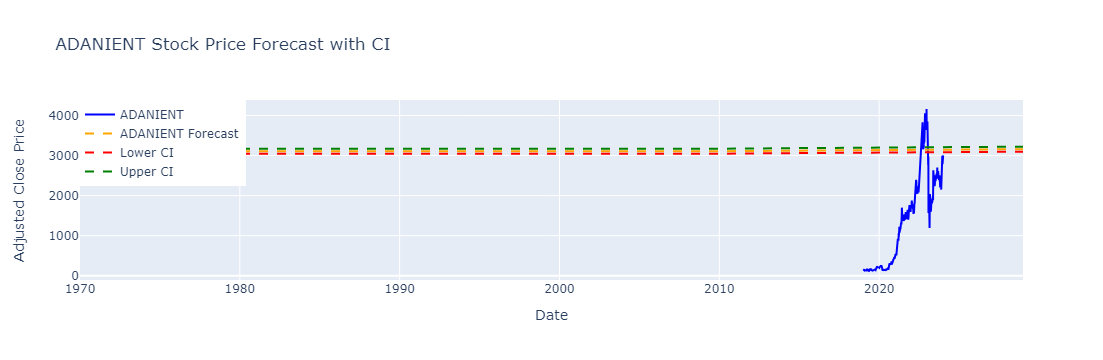

In [13]:
import pandas as pd
import plotly.graph_objects as go
import statsmodels.api as sm
from datetime import timedelta

def forecast_stock_with_ci(data, forecast_days, alpha=0.05):
    # Create features (days) for the linear regression model
    data['days'] = (data.index - data.index[0]).days
    X = data['days']
    X = sm.add_constant(X)
    y = data['Adj Close']

    # Fit linear regression model
    model = sm.OLS(y, X).fit()

    # Create future dates for forecasting
    future_dates = pd.date_range(data.index[-1] + timedelta(days=1), periods=forecast_days, freq='B')

    # Predict future values and confidence intervals
    future_days = sm.add_constant((future_dates - data.index[0]).days)
    forecast = model.get_prediction(future_days)
    forecast_df = forecast.summary_frame(alpha=alpha)

    return forecast_df

def plot_forecast_with_ci(data, forecast_df, stock_label):
    fig = go.Figure()

    # Plot historical data
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name=stock_label, line=dict(color='blue')))

    # Plot forecast
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['mean'],
                             mode='lines', name=f'{stock_label} Forecast', line=dict(color='orange', dash='dash')))

    # Plot confidence intervals
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['mean_ci_lower'],
                             mode='lines', name='Lower CI', line=dict(color='red', dash='dash')))
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['mean_ci_upper'],
                             mode='lines', name='Upper CI', line=dict(color='green', dash='dash')))

    fig.update_layout(title=f'{stock_label} Stock Price Forecast with CI',
                      xaxis_title='Date',
                      yaxis_title='Adjusted Close Price',
                      legend=dict(x=0, y=1, traceorder='normal'))

    fig.show()

# Forecast parameters
forecast_days = 30  
# Iterate through each stock, create a forecast with CI, and plot the results
for stock_ticker in top_stocks:
    # Get historical data for the current stock from df
    stock_data = df[df['Stock'] == stock_ticker].copy()

    # Create a forecast with confidence intervals for the current stock
    forecast_df = forecast_stock_with_ci(stock_data, forecast_days)

    # Plot the forecast with confidence intervals for the current stock using Plotly
    plot_forecast_with_ci(stock_data, forecast_df, stock_ticker)


In [14]:
#not including forecasting in the final streamlit app as its not included in the problem statement